Importing the Required Libraries and Reading the data

In [7]:
# from google.colab import drive
# drive.mount ('/content/drive')

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#for encoding
from sklearn.preprocessing import LabelEncoder

#for train test splitting
from sklearn.model_selection import train_test_split

#for decision tree object
from sklearn.tree import DecisionTreeClassifier

#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix

#for visualizing tree 
from sklearn.tree import plot_tree

pd.set_option('display.max_columns', None)

In [9]:
# to load data from csv 
#path ="/content/drive/MyDrive/Colab Notebooks/MLAR/2018 Wave 6/FII India 2018 (public+ANONGPS).csv"
path ="./FII India 2018 (public+ANONGPS).csv"

df= pd.read_csv(path)

# Describe data set

df.head

/Users/kalyan/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<bound method NDFrame.head of          Serial   Latitude  Longitude    AA2            AA3               AA4  \
0      73476198  28.693716   77.32205  NORTH          Delhi  North East Delhi   
1      73477443  27.316935   80.95694  NORTH  Uttar Pradesh           Sitapur   
2      73477514  27.316935   80.95694  NORTH  Uttar Pradesh           Sitapur   
3      73477924  26.967157   80.20460  NORTH  Uttar Pradesh             Unnao   
4      73478173  27.316935   80.95694  NORTH  Uttar Pradesh           Sitapur   
...         ...        ...        ...    ...            ...               ...   
48022  82898664  18.777156   76.08617   WEST    Maharashtra               Bid   
48023  82898665  18.777156   76.08617   WEST    Maharashtra               Bid   
48024  82898666  18.777156   76.08617   WEST    Maharashtra               Bid   
48025  82898667  18.777156   76.08617   WEST    Maharashtra               Bid   
48026  82898668  18.777156   76.08617   WEST    Maharashtra               Bid  

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48027 entries, 0 to 48026
Columns: 733 entries, Serial to fn
dtypes: float64(5), int64(300), object(428)
memory usage: 268.6+ MB


In [11]:
df.describe()

,Serial,Latitude,Longitude,AA9,I_1_D3,I_1_D4,I_3_D3,I_3_D4,I_4_D3,I_4_D4,I_5_D3,I_5_D4,I_6_D3,I_6_D4,I_7_D3,I_7_D4,I_8_D3,I_8_D4,I_9_D3,I_9_D4,I_10_D3,I_10_D4,I_11_D3,I_11_D4,I_12_D3,I_12_D4,I_13_D3,I_13_D4,I_14_D3,I_14_D4,I_15_D3,I_15_D4,I_16_D3,I_16_D4,I_17_D3,I_17_D4,I_18_D3,I_18_D4,I_19_D3,I_19_D4,I_20_D3,I_20_D4,I_21_D3,I_21_D4,I_22_D3,I_22_D4,I_23_D3,I_23_D4,I_24_D3,I_24_D4,I_25_D3,I_25_D4,DG1,DG2,DG3,DG3A,DG4,WB1,WB2,WB2A,WB2B,WB3,WB4,DG5_1,DG5_2,DG5_3,DG5_4,DG5_5,DG5_6,DG5_7,DG5_8,DG5_9,DG5_10,DG6,DL0,DL1,DL4_1,DL4_2,DL4_3,DL4_4,DL4_5,DL4_6,DL4_7,DL4_8,DL4_9,DL4_10,DL6,DL11,DL12_1,DL12_2,DL12_3,DL12_4,DL14,DL15,DL16,DL17,DL18,DL19,DL20,DL21,DL22,DL23,DL24,GN1,GN2,GN3,GN4,GN5,GN6,GN7,GN8,FH1,FH2,FH3,FH4,FH5,FH6,FH7,FH8,FH9,FH10,FH11,FH12,FL12,FL13,FL14,FL15,FL16,FL17,FL18,FL19,FL20,FL21,MT2,MT7,MT12_1,MT12_2,MT12_3,MT12_4,MT12_5,MT12_6,MT12_7,MT12_8,MT12_9,MT12_10,MT12_11,MT12_12,MT12_13,MT12_14,MT15,MT17_1,MT17_2,MT17_3,MT17_4,MT17_5,MT17_6,MT17_7,MT17_8,MT17_9,MT18A_1,MT18A_2,MT18A_3,MT18A_4,MT18A_5,MT18A_6,FN1_1,FN1_2,FN1_3,FN1_13,FN1_15,FN2_1,FN2_2,PB0,PB1_1,PB1_2,PB1_3,PB1_4,PB1_5,PB1_6,PB1_7,MM0,MM1_1,MM1_2,MM1_3,FN5_1,FN5_2,FN6_1,FN6_2,UP1_1,UP1_2,UP1_3,UP1_4,UP1_5,UP1_6,UP1_7,UP1_8,UP1_9,UP2_1,UP2_6,UP2_7,AD1,AD2_17,AD2_18,AD2_19,AD2_20,AD2_21,AD2_22,AD2_23,AD2_24,AD2_25,AD2_26,AD3,AD4,AD5,AD6,AD7,AD8,FB27_1,FB27_2,FB27_3,FB27_4,FB27_5,FB27_6,FB27_7,FB27_8,FB27_9,FB27_10,FB27_11,AD9,AD10,AD11,IFI14_1,IFI14_2,IFI14_3,IFI14_4,IFI14_5,IFI14_6,IFI14_7,IFI14_8,IFI14_9,IFI15_1A,IFI15_2A,IFI15_3A,IFI15_4A,IFI15_5A,IFI15_6A,IFI15_7A,IFI15_8A,IFI15_9A,LN1,LN2_1,LN2_2,IFI15_1,IFI15_2,IFI15_3,IFI15_4,IFI15_5,IFI15_6,IFI15_7,IFI15_8,IFI15_9,weight,ppi_score,ppi_prob,ppi_cutoff,ppi_prob_125,ppi_cutoff_125,poverty,access_phone,own_phone,FI,active_financial,access_financial_all,access_financial,access_dfs,active_dfs,active_dfs_adv,access_mm,active_mm,aware_mm_provider,registered_mm,nonregistered_mm,access_bank_full,registered_bank_full,active_bank_full,access_post,access_payment,access_coop,registered_post,registered_payment,registered_coop,active_post,active_payment,active_coop,access_nbfi,registered_nbfi,active_nbfi,financial_stage,age,age_group,UR,edu,Literacy,Numeracy,fn
count,4.802700e+04,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000

In [12]:
df.isnull().any()


Serial       False
Latitude     False
Longitude    False
AA2          False
AA3          False
             ...  
UR           False
edu          False
Literacy     False
Numeracy     False
fn           False
Length: 733, dtype: bool

In [13]:
df.head()

,Serial,Latitude,Longitude,AA2,AA3,AA4,AA5,AA6,AA7,AA9,I_1_D3,I_1_D4,I_2_D3,I_2_D4,I_3_D3,I_3_D4,I_4_D3,I_4_D4,I_5_D3,I_5_D4,I_6_D3,I_6_D4,I_7_D3,I_7_D4,I_8_D3,I_8_D4,I_9_D3,I_9_D4,I_10_D3,I_10_D4,I_11_D3,I_11_D4,I_12_D3,I_12_D4,I_13_D3,I_13_D4,I_14_D3,I_14_D4,I_15_D3,I_15_D4,I_16_D3,I_16_D4,I_17_D3,I_17_D4,I_18_D3,I_18_D4,I_19_D3,I_19_D4,I_20_D3,I_20_D4,I_21_D3,I_21_D4,I_22_D3,I_22_D4,I_23_D3,I_23_D4,I_24_D3,I_24_D4,I_25_D3,I_25_D4,DG1,DG2,DG3,DG3A,DG4,WB1,WB2,WB2A,WB2B,WB3,WB4,WB4A,DG5_1,DG5_2,DG5_3,DG5_4,DG5_5,DG5_6,DG5_7,DG5_8,DG5_9,DG5_10,DG5A_1,DG5A_2,DG5B_1,DG5B_2,DG5B_3,DG5C_1,DG5C_2,DG5C_3,DG6,DL0,DL1,DL2,DL4_1,DL4_2,DL4_3,DL4_4,DL4_5,DL4_6,DL4_7,DL4_8,DL4_9,DL4_10,DL6,DL7,DL11,DL12_1,DL12_2,DL12_3,DL12_4,DL12A_1,DL12A_2,DL12A_3,DL12A_4,DL12B_1,DL12B_2,DL12B_3,DL12B_4,DL14,DL15,DL16,DL17,DL18,DL19,DL20,DL21,DL22,DL23,DL24,GN1,GN2,GN3,GN4,GN5,GN6,GN7,GN8,FH1,FH2,FH3,FH4,FH5,FH6,FH7,FH8,FH9,FH10,FH11,FH12,FL12,FL13,FL14,FL15,FL16,FL17,FL18,FL19,FL20,FL21,MT2,MT2A_1,MT2A_2,MT2A_3,MT2B,MT6B,MT6C,MT6D,MT6E,MTGN,MT7,MT8,MT9_1,MT9_2,MT9_3,MT9_4,MT9_5,MT12_1,MT12_2,MT12_3,MT12_4,MT12_5,MT12_6,MT12_7,MT12_8,MT12_9,MT12_10,MT12_11,MT12_12,MT12_13,MT12_14,MT15,MT17_1,MT17_2,MT17_3,MT17_4,MT17_5,MT17_6,MT17_7,MT17_8,MT17_9,MT18A_1,MT18A_2,MT18A_3,MT18A_4,MT18A_5,MT18A_6,FN1_1,FN1_2,FN1_3,FN1_4,FN1_5,FN1_6,FN1_7,FN1_8,FN1_9,FN1_10,FN1_11,FN1_12,FN1_13,FN1_14,FN1_15,FN1_16,FGN1,FN2_1,FN2_2,FN2_3,PB0,PB1_1,PB1_2,PB1_3,PB1_4,PB1_5,PB1_6,PB1_7,FN3_1,PB2_1,PB2_2,PB2_3,PB2_4,PB2_5,PB2_6,FN3_2,PB3_1,PB3_2,PB3_3,PB3_4,PB3_5,PB3_6,FN3_3_1,FN3_3_2,FN3_3_3,FN3_3_4,FN3_3_5,FN3_3_6,FN3_3_7,MM0,MM1_1,MM1_2,MM1_3,FN4_1,MM2_1,MM2_2,FN4_2,MM3_1,MM3_2,FN4_3_1,FN4_3_2,FN4_3_3,FN5_1,FN5_2,FN5_3,FGN2,FN6_1,FN6_2,FN6_3,FN6_4,UP1_1,UP1_2,UP1_3,UP1_4,UP1_5,UP1_6,UP1_7,UP1_8,UP1_9,UP1_10,UP2_1,UP2_2,UP2_3,UP2_4,UP2_5,UP2_6,UP2_7,UP3_1,UP3_2,UP3_3,UP3_4,UP3_5,UP3_6,UP3_7,UP4_1,UP4_2,UP4_3,UP4_4,UP4_5,UP4_6,UP4_7,UP5_1,UP5_2,UP5_3,UP5_4,UP5_5,UP5_6,UP5_7,UP6,UP7,UP8,UP9,UP10,UP11,UP12,UP13,UP14,UP15,UP16,MA0,MA1,MA2,MA3,MA4,MA5,MA6,MA7,MA8,MA9,MA10,PA0,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PA8,PA9,PA10,BA1,BA2,BA3_1,BA3_2,BA3_3,BA3_4,BA3_5,BA3_6,BA3_7,BA3_8,BA3_9,BA3_10,MM12_1,MM12_2,MM12_3,MM12_4,MM12_5,MM12_6,MM12_7,MM12_8,PB4_1,PB4_2,PB4_3,PB4_4,PB4_5,PB4_6,PB4_7,PB4_8,FF3_1,FF3_2,FF3_3,FF3_4,FF3_5,FF3_6,AD1,AD1_1,AD1_2,AD1_3,AD1_4,AD1_5,AD1_6,AD1_7,AD1_8,AD1_9,AD1_10,AD1_11,AD1_12,AD1_13,AD1_14,AD1_15,AD1_16,AD1_17,AD1_18,AD2_1,AD2_2,AD2_3,AD2_4,AD2_5,AD2_6,AD2_7,AD2_8,AD2_9,AD2_10,AD2_11,AD2_12,AD2_13,AD2_14,AD2_15,AD2_16,AD2_17,AD2_18,AD2_19,AD2_20,AD2_21,AD2_22,AD2_23,AD2_24,AD2_25,AD2_26,AD3,AD3_1,AD3_2,AD3_3,AD3_4,AD3_5,AD3_6,AD3_7,AD3_8,AD3_9,AD3_10,AD3_11,AD3_12,AD3_13,AD3_14,AD3_15,AD3_16,AD3_17,AD3_18,AD4,AD4_1,AD4_2,AD4_3,AD4_4,AD4_5,AD4_6,AD4_7,AD4_8,AD4_9,AD4_10,AD4_11,AD4_12,AD4_13,AD4_14,AD4_15,AD4_16,AD4_17,AD5,AD5_1,AD5_2,AD5_3,AD5_4,AD5_5,AD5_6,AD5_7,AD5_8,AD5_9,AD5_10,AD5_11,AD5_12,AD5_13,AD5_14,AD5_15,AD5_16,AD5_17,AD6,AD6_1,AD6_2,AD6_3,AD6_4,AD6_5,AD6_6,AD6_7,AD6_9,AD6_10,AD6_11,AD6_12,AD6_13,AD6_14,AD6_15,AD6_17,AD7,AD7_1,AD7_2,AD7_3,AD7_4,AD7_5,AD7_6,AD7_7,AD7_9,AD7_10,AD7_11,AD7_12,AD7_13,AD7_14,AD7_15,AD7_17,AD8,AD8_1,AD8_2,AD8_3,AD8_4,AD8_5,AD8_6,AD8_7,AD8_8,AD8_9,AD8_10,AD8_11,AD8_12,AD8_13,AD8_14,AD8_15,AD8_16,AD8_17,FB27_1,FB27_2,FB27_3,FB27_4,FB27_5,FB27_6,FB27_7,FB27_8,FB27_9,FB27_10,FB27_11,AD9,AD9A,AD9B,AD9_1,AD9_2,AD9_3,AD9_4,AD9_5,AD9_6,AD9_7,AD9_8,AD9_9,AD9_10,AD9_11,AD9_12,AD9_13,AD9_14,AD9_15,AD9_16,AD9_17,AD9_18,AD9_19,AD9_20,AD9_21,AD9_22,AD9_23,AD9_24,AD9_25,AD9_26,AD9_27,AD9_28,AD10,AD10_1,AD10_2,AD10_3,AD10_4,AD10_5,AD10_6,AD10_7,AD10_8,AD10_9,AD10_10,AD10_11,AD10_12,AD10_13,AD10_14,AD10_15,AD10_16,AD10_17,AD10_18,AD10_19,AD10_20,AD10_21,AD10_22,AD10_23,AD10_24,AD10_25,AD10_26,AD10_27,AD10_28,AD10_29,AD10_30,AD10_31,AD10_32,AD10_33,AD10_34,AD10_35,AD10_36,AD10_37,AD10_38,AD10_39,AD11,AD11_1,AD11_2,AD11_3,AD11_4,AD11_5,AD11_6,AD11_7,AD11_8,AD11_9,AD11_10,AD11_11,AD11_12,AD11_13,AD11_14,AD11_15,AD11_16,AD11_17,AD11_18,AD11_

In [14]:
df.shape

(48027, 733)

In [15]:
df.isnull().sum()


Serial       0
Latitude     0
Longitude    0
AA2          0
AA3          0
            ..
UR           0
edu          0
Literacy     0
Numeracy     0
fn           0
Length: 733, dtype: int64

In [16]:
duplicatevalues = df.duplicated()
print (duplicatevalues.sum())
df[duplicatevalues]

0


,Serial,Latitude,Longitude,AA2,AA3,AA4,AA5,AA6,AA7,AA9,I_1_D3,I_1_D4,I_2_D3,I_2_D4,I_3_D3,I_3_D4,I_4_D3,I_4_D4,I_5_D3,I_5_D4,I_6_D3,I_6_D4,I_7_D3,I_7_D4,I_8_D3,I_8_D4,I_9_D3,I_9_D4,I_10_D3,I_10_D4,I_11_D3,I_11_D4,I_12_D3,I_12_D4,I_13_D3,I_13_D4,I_14_D3,I_14_D4,I_15_D3,I_15_D4,I_16_D3,I_16_D4,I_17_D3,I_17_D4,I_18_D3,I_18_D4,I_19_D3,I_19_D4,I_20_D3,I_20_D4,I_21_D3,I_21_D4,I_22_D3,I_22_D4,I_23_D3,I_23_D4,I_24_D3,I_24_D4,I_25_D3,I_25_D4,DG1,DG2,DG3,DG3A,DG4,WB1,WB2,WB2A,WB2B,WB3,WB4,WB4A,DG5_1,DG5_2,DG5_3,DG5_4,DG5_5,DG5_6,DG5_7,DG5_8,DG5_9,DG5_10,DG5A_1,DG5A_2,DG5B_1,DG5B_2,DG5B_3,DG5C_1,DG5C_2,DG5C_3,DG6,DL0,DL1,DL2,DL4_1,DL4_2,DL4_3,DL4_4,DL4_5,DL4_6,DL4_7,DL4_8,DL4_9,DL4_10,DL6,DL7,DL11,DL12_1,DL12_2,DL12_3,DL12_4,DL12A_1,DL12A_2,DL12A_3,DL12A_4,DL12B_1,DL12B_2,DL12B_3,DL12B_4,DL14,DL15,DL16,DL17,DL18,DL19,DL20,DL21,DL22,DL23,DL24,GN1,GN2,GN3,GN4,GN5,GN6,GN7,GN8,FH1,FH2,FH3,FH4,FH5,FH6,FH7,FH8,FH9,FH10,FH11,FH12,FL12,FL13,FL14,FL15,FL16,FL17,FL18,FL19,FL20,FL21,MT2,MT2A_1,MT2A_2,MT2A_3,MT2B,MT6B,MT6C,MT6D,MT6E,MTGN,MT7,MT8,MT9_1,MT9_2,MT9_3,MT9_4,MT9_5,MT12_1,MT12_2,MT12_3,MT12_4,MT12_5,MT12_6,MT12_7,MT12_8,MT12_9,MT12_10,MT12_11,MT12_12,MT12_13,MT12_14,MT15,MT17_1,MT17_2,MT17_3,MT17_4,MT17_5,MT17_6,MT17_7,MT17_8,MT17_9,MT18A_1,MT18A_2,MT18A_3,MT18A_4,MT18A_5,MT18A_6,FN1_1,FN1_2,FN1_3,FN1_4,FN1_5,FN1_6,FN1_7,FN1_8,FN1_9,FN1_10,FN1_11,FN1_12,FN1_13,FN1_14,FN1_15,FN1_16,FGN1,FN2_1,FN2_2,FN2_3,PB0,PB1_1,PB1_2,PB1_3,PB1_4,PB1_5,PB1_6,PB1_7,FN3_1,PB2_1,PB2_2,PB2_3,PB2_4,PB2_5,PB2_6,FN3_2,PB3_1,PB3_2,PB3_3,PB3_4,PB3_5,PB3_6,FN3_3_1,FN3_3_2,FN3_3_3,FN3_3_4,FN3_3_5,FN3_3_6,FN3_3_7,MM0,MM1_1,MM1_2,MM1_3,FN4_1,MM2_1,MM2_2,FN4_2,MM3_1,MM3_2,FN4_3_1,FN4_3_2,FN4_3_3,FN5_1,FN5_2,FN5_3,FGN2,FN6_1,FN6_2,FN6_3,FN6_4,UP1_1,UP1_2,UP1_3,UP1_4,UP1_5,UP1_6,UP1_7,UP1_8,UP1_9,UP1_10,UP2_1,UP2_2,UP2_3,UP2_4,UP2_5,UP2_6,UP2_7,UP3_1,UP3_2,UP3_3,UP3_4,UP3_5,UP3_6,UP3_7,UP4_1,UP4_2,UP4_3,UP4_4,UP4_5,UP4_6,UP4_7,UP5_1,UP5_2,UP5_3,UP5_4,UP5_5,UP5_6,UP5_7,UP6,UP7,UP8,UP9,UP10,UP11,UP12,UP13,UP14,UP15,UP16,MA0,MA1,MA2,MA3,MA4,MA5,MA6,MA7,MA8,MA9,MA10,PA0,PA1,PA2,PA3,PA4,PA5,PA6,PA7,PA8,PA9,PA10,BA1,BA2,BA3_1,BA3_2,BA3_3,BA3_4,BA3_5,BA3_6,BA3_7,BA3_8,BA3_9,BA3_10,MM12_1,MM12_2,MM12_3,MM12_4,MM12_5,MM12_6,MM12_7,MM12_8,PB4_1,PB4_2,PB4_3,PB4_4,PB4_5,PB4_6,PB4_7,PB4_8,FF3_1,FF3_2,FF3_3,FF3_4,FF3_5,FF3_6,AD1,AD1_1,AD1_2,AD1_3,AD1_4,AD1_5,AD1_6,AD1_7,AD1_8,AD1_9,AD1_10,AD1_11,AD1_12,AD1_13,AD1_14,AD1_15,AD1_16,AD1_17,AD1_18,AD2_1,AD2_2,AD2_3,AD2_4,AD2_5,AD2_6,AD2_7,AD2_8,AD2_9,AD2_10,AD2_11,AD2_12,AD2_13,AD2_14,AD2_15,AD2_16,AD2_17,AD2_18,AD2_19,AD2_20,AD2_21,AD2_22,AD2_23,AD2_24,AD2_25,AD2_26,AD3,AD3_1,AD3_2,AD3_3,AD3_4,AD3_5,AD3_6,AD3_7,AD3_8,AD3_9,AD3_10,AD3_11,AD3_12,AD3_13,AD3_14,AD3_15,AD3_16,AD3_17,AD3_18,AD4,AD4_1,AD4_2,AD4_3,AD4_4,AD4_5,AD4_6,AD4_7,AD4_8,AD4_9,AD4_10,AD4_11,AD4_12,AD4_13,AD4_14,AD4_15,AD4_16,AD4_17,AD5,AD5_1,AD5_2,AD5_3,AD5_4,AD5_5,AD5_6,AD5_7,AD5_8,AD5_9,AD5_10,AD5_11,AD5_12,AD5_13,AD5_14,AD5_15,AD5_16,AD5_17,AD6,AD6_1,AD6_2,AD6_3,AD6_4,AD6_5,AD6_6,AD6_7,AD6_9,AD6_10,AD6_11,AD6_12,AD6_13,AD6_14,AD6_15,AD6_17,AD7,AD7_1,AD7_2,AD7_3,AD7_4,AD7_5,AD7_6,AD7_7,AD7_9,AD7_10,AD7_11,AD7_12,AD7_13,AD7_14,AD7_15,AD7_17,AD8,AD8_1,AD8_2,AD8_3,AD8_4,AD8_5,AD8_6,AD8_7,AD8_8,AD8_9,AD8_10,AD8_11,AD8_12,AD8_13,AD8_14,AD8_15,AD8_16,AD8_17,FB27_1,FB27_2,FB27_3,FB27_4,FB27_5,FB27_6,FB27_7,FB27_8,FB27_9,FB27_10,FB27_11,AD9,AD9A,AD9B,AD9_1,AD9_2,AD9_3,AD9_4,AD9_5,AD9_6,AD9_7,AD9_8,AD9_9,AD9_10,AD9_11,AD9_12,AD9_13,AD9_14,AD9_15,AD9_16,AD9_17,AD9_18,AD9_19,AD9_20,AD9_21,AD9_22,AD9_23,AD9_24,AD9_25,AD9_26,AD9_27,AD9_28,AD10,AD10_1,AD10_2,AD10_3,AD10_4,AD10_5,AD10_6,AD10_7,AD10_8,AD10_9,AD10_10,AD10_11,AD10_12,AD10_13,AD10_14,AD10_15,AD10_16,AD10_17,AD10_18,AD10_19,AD10_20,AD10_21,AD10_22,AD10_23,AD10_24,AD10_25,AD10_26,AD10_27,AD10_28,AD10_29,AD10_30,AD10_31,AD10_32,AD10_33,AD10_34,AD10_35,AD10_36,AD10_37,AD10_38,AD10_39,AD11,AD11_1,AD11_2,AD11_3,AD11_4,AD11_5,AD11_6,AD11_7,AD11_8,AD11_9,AD11_10,AD11_11,AD11_12,AD11_13,AD11_14,AD11_15,AD11_16,AD11_17,AD11_18,AD11_

In [17]:
#categorical_summerized

def categorical_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', verbose=True):
    '''
    Helper function that gives a quick summary of a given column of categorical data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data, y would be the count
    y: str. vertical axis to plot the labels of categorical data, x would be the count
    hue: str. if you want to compare it another variable (usually the target variable)
    palette: array-like. Colour of the plot
    Returns
    =======
    Quick Stats of the data and also the count plot
    '''
    if x == None:
        column_interested = y
    else:
        column_interested = x
    series = dataframe[column_interested]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.countplot(x=x, y=y, hue=hue, data=dataframe, palette=palette)
    plt.show()

count    48027.000000
mean         1.890145
std          0.312712
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          2.000000
Name: MT12_6, dtype: float64
mode:  0    2
dtype: int64
2    42751
1     5276
Name: MT12_6, dtype: int64


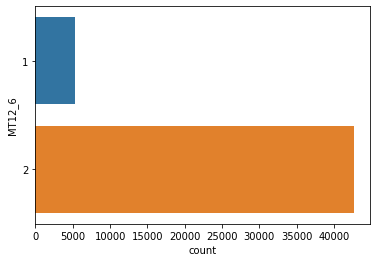

In [18]:
# univariate analysis of Y 

# Target Variable: Own a jio sim (mt12_6)
c_palette = ['tab:blue', 'tab:orange']
categorical_summarized(df, y = 'MT12_6', palette=c_palette)

count    48027.000000
mean      1980.314032
std         15.612075
min       1917.000000
25%       1970.000000
50%       1983.000000
75%       1993.000000
max       2003.000000
Name: DG1, dtype: float64
mode:  0    1988
dtype: int64


KeyboardInterrupt: 

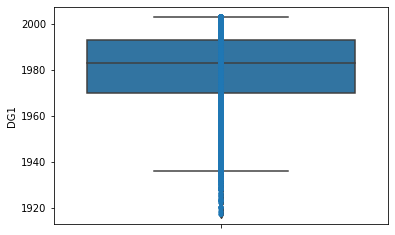

In [19]:
# univariate analysis of age  i.e quantitative
def quantitative_summarized(dataframe, x=None, y=None, hue=None, palette='Set1', ax=None, verbose=True, swarm=False):
    '''
    Helper function that gives a quick summary of quantattive data
    Arguments
    =========
    dataframe: pandas dataframe
    x: str. horizontal axis to plot the labels of categorical data (usually the target variable)
    y: str. vertical axis to plot the quantitative data
    hue: str. if you want to compare it another categorical variable (usually the target variable if x is another variable)
    palette: array-like. Colour of the plot
    swarm: if swarm is set to True, a swarm plot would be overlayed
    Returns
    =======
    Quick Stats of the data and also the box plot of the distribution
    '''
    series = dataframe[y]
    print(series.describe())
    print('mode: ', series.mode())
    if verbose:
        print('='*80)
        print(series.value_counts())

    sns.boxplot(x=x, y=y, hue=hue, data=dataframe, palette=palette, ax=ax)

    if swarm:
        sns.swarmplot(x=x, y=y, hue=hue, data=dataframe,
                      palette=palette, ax=ax)

    plt.show()
quantitative_summarized(dataframe= df, y = 'DG1', palette=c_palette, verbose=False, swarm=True)

In [ ]:
#Serial	Latitude	Longitude	AA2	AA3	AA4	AA5	AA6	AA7	AA9	I_1_D3	I_1_D4	I_2_D3	I_2_D4	I_3_D3	I_3_D4	I_4_D3	I_4_D4	I_5_D3	I_5_D4	I_6_D3	I_6_D4	I_7_D3	I_7_D4	I_8_D3	I_8_D4	I_9_D3	I_9_D4	I_10_D3	I_10_D4	I_11_D3	I_11_D4	I_12_D3	I_12_D4	I_13_D3	I_13_D4	I_14_D3	I_14_D4	I_15_D3	I_15_D4	I_16_D3	I_16_D4	I_17_D3	I_17_D4	I_18_D3	I_18_D4	I_19_D3	I_19_D4	I_20_D3	I_20_D4	I_21_D3	I_21_D4	I_22_D3	I_22_D4	I_23_D3	I_23_D4	I_24_D3	I_24_D4	I_25_D3	I_25_D4	DG1	DG2	DG3	DG3A	DG4	WB1	WB2	WB2A	WB2B	WB3	WB4	WB4A	DG5_1	DG5_2	DG5_3	DG5_4	DG5_5	DG5_6	DG5_7	DG5_8	DG5_9	DG5_10	DG5A_1	DG5A_2	DG5B_1	DG5B_2	DG5B_3	DG5C_1	DG5C_2	DG5C_3	DG6	DL0	DL1	DL2	DL4_1	DL4_2	DL4_3	DL4_4	DL4_5	DL4_6	DL4_7	DL4_8	DL4_9	DL4_10	DL6	DL7	DL11	DL12_1	DL12_2	DL12_3	DL12_4	DL12A_1	DL12A_2	DL12A_3	DL12A_4	DL12B_1	DL12B_2	DL12B_3	DL12B_4	DL14	DL15	DL16	DL17	DL18	DL19	DL20	DL21	DL22	DL23	DL24	GN1	GN2	GN3	GN4	GN5	GN6	GN7	GN8	FH1	FH2	FH3	FH4	FH5	FH6	FH7	FH8	FH9	FH10	FH11	FH12	FL12	FL13	FL14	FL15	FL16	FL17	FL18	FL19	FL20	FL21	MT2	MT2A_1	MT2A_2	MT2A_3	MT2B	MT6B	MT6C	MT6D	MT6E	MTGN	MT7	MT8	MT9_1	MT9_2	MT9_3	MT9_4	MT9_5	MT12_1	MT12_2	MT12_3	MT12_4	MT12_5	MT12_6	MT12_7	MT12_8	MT12_9	MT12_10	MT12_11	MT12_12	MT12_13	MT12_14	MT15	MT17_1	MT17_2	MT17_3	MT17_4	MT17_5	MT17_6	MT17_7	MT17_8	MT17_9	MT18A_1	MT18A_2	MT18A_3	MT18A_4	MT18A_5	MT18A_6	FN1_1	FN1_2	FN1_3	FN1_4	FN1_5	FN1_6	FN1_7	FN1_8	FN1_9	FN1_10	FN1_11	FN1_12	FN1_13	FN1_14	FN1_15	FN1_16	FGN1	FN2_1	FN2_2	FN2_3	PB0	PB1_1	PB1_2	PB1_3	PB1_4	PB1_5	PB1_6	PB1_7	FN3_1	PB2_1	PB2_2	PB2_3	PB2_4	PB2_5	PB2_6	FN3_2	PB3_1	PB3_2	PB3_3	PB3_4	PB3_5	PB3_6	FN3_3_1	FN3_3_2	FN3_3_3	FN3_3_4	FN3_3_5	FN3_3_6	FN3_3_7	MM0	MM1_1	MM1_2	MM1_3	FN4_1	MM2_1	MM2_2	FN4_2	MM3_1	MM3_2	FN4_3_1	FN4_3_2	FN4_3_3	FN5_1	FN5_2	FN5_3	FGN2	FN6_1	FN6_2	FN6_3	FN6_4	UP1_1	UP1_2	UP1_3	UP1_4	UP1_5	UP1_6	UP1_7	UP1_8	UP1_9	UP1_10	UP2_1	UP2_2	UP2_3	UP2_4	UP2_5	UP2_6	UP2_7	UP3_1	UP3_2	UP3_3	UP3_4	UP3_5	UP3_6	UP3_7	UP4_1	UP4_2	UP4_3	UP4_4	UP4_5	UP4_6	UP4_7	UP5_1	UP5_2	UP5_3	UP5_4	UP5_5	UP5_6	UP5_7	UP6	UP7	UP8	UP9	UP10	UP11	UP12	UP13	UP14	UP15	UP16	MA0	MA1	MA2	MA3	MA4	MA5	MA6	MA7	MA8	MA9	MA10	PA0	PA1	PA2	PA3	PA4	PA5	PA6	PA7	PA8	PA9	PA10	BA1	BA2	BA3_1	BA3_2	BA3_3	BA3_4	BA3_5	BA3_6	BA3_7	BA3_8	BA3_9	BA3_10	MM12_1	MM12_2	MM12_3	MM12_4	MM12_5	MM12_6	MM12_7	MM12_8	PB4_1	PB4_2	PB4_3	PB4_4	PB4_5	PB4_6	PB4_7	PB4_8	FF3_1	FF3_2	FF3_3	FF3_4	FF3_5	FF3_6	AD1	AD1_1	AD1_2	AD1_3	AD1_4	AD1_5	AD1_6	AD1_7	AD1_8	AD1_9	AD1_10	AD1_11	AD1_12	AD1_13	AD1_14	AD1_15	AD1_16	AD1_17	AD1_18	AD2_1	AD2_2	AD2_3	AD2_4	AD2_5	AD2_6	AD2_7	AD2_8	AD2_9	AD2_10	AD2_11	AD2_12	AD2_13	AD2_14	AD2_15	AD2_16	AD2_17	AD2_18	AD2_19	AD2_20	AD2_21	AD2_22	AD2_23	AD2_24	AD2_25	AD2_26	AD3	AD3_1	AD3_2	AD3_3	AD3_4	AD3_5	AD3_6	AD3_7	AD3_8	AD3_9	AD3_10	AD3_11	AD3_12	AD3_13	AD3_14	AD3_15	AD3_16	AD3_17	AD3_18	AD4	AD4_1	AD4_2	AD4_3	AD4_4	AD4_5	AD4_6	AD4_7	AD4_8	AD4_9	AD4_10	AD4_11	AD4_12	AD4_13	AD4_14	AD4_15	AD4_16	AD4_17	AD5	AD5_1	AD5_2	AD5_3	AD5_4	AD5_5	AD5_6	AD5_7	AD5_8	AD5_9	AD5_10	AD5_11	AD5_12	AD5_13	AD5_14	AD5_15	AD5_16	AD5_17	AD6	AD6_1	AD6_2	AD6_3	AD6_4	AD6_5	AD6_6	AD6_7	AD6_9	AD6_10	AD6_11	AD6_12	AD6_13	AD6_14	AD6_15	AD6_17	AD7	AD7_1	AD7_2	AD7_3	AD7_4	AD7_5	AD7_6	AD7_7	AD7_9	AD7_10	AD7_11	AD7_12	AD7_13	AD7_14	AD7_15	AD7_17	AD8	AD8_1	AD8_2	AD8_3	AD8_4	AD8_5	AD8_6	AD8_7	AD8_8	AD8_9	AD8_10	AD8_11	AD8_12	AD8_13	AD8_14	AD8_15	AD8_16	AD8_17	FB27_1	FB27_2	FB27_3	FB27_4	FB27_5	FB27_6	FB27_7	FB27_8	FB27_9	FB27_10	FB27_11	AD9	AD9A	AD9B	AD9_1	AD9_2	AD9_3	AD9_4	AD9_5	AD9_6	AD9_7	AD9_8	AD9_9	AD9_10	AD9_11	AD9_12	AD9_13	AD9_14	AD9_15	AD9_16	AD9_17	AD9_18	AD9_19	AD9_20	AD9_21	AD9_22	AD9_23	AD9_24	AD9_25	AD9_26	AD9_27	AD9_28	AD10	AD10_1	AD10_2	AD10_3	AD10_4	AD10_5	AD10_6	AD10_7	AD10_8	AD10_9	AD10_10	AD10_11	AD10_12	AD10_13	AD10_14	AD10_15	AD10_16	AD10_17	AD10_18	AD10_19	AD10_20	AD10_21	AD10_22	AD10_23	AD10_24	AD10_25	AD10_26	AD10_27	AD10_28	AD10_29	AD10_30	AD10_31	AD10_32	AD10_33	AD10_34	AD10_35	AD10_36	AD10_37	AD10_38	AD10_39	AD11	AD11_1	AD11_2	AD11_3	AD11_4	AD11_5	AD11_6	AD11_7	AD11_8	AD11_9	AD11_10	AD11_11	AD11_12	AD11_13	AD11_14	AD11_15	AD11_16	AD11_17	AD11_18	AD11_19	AD11_20	AD11_21	AD11_22	AD11_23	AD11_24	AD11_25	AD11_26	AD11_27	AD11_28	FB19	FB19_1	FB19_2	FB19_3	FB19_4	FB19_5	IFI14_1	IFI14_2	IFI14_3	IFI14_4	IFI14_5	IFI14_6	IFI14_7	IFI14_8	IFI14_9	IFI15_1A	IFI15_1B	IFI15_2A	IFI15_2B	IFI15_3A	IFI15_3B	IFI15_4A	IFI15_4B	IFI15_5A	IFI15_5B	IFI15_6A	IFI15_6B	IFI15_7A	IFI15_7B	IFI15_8A	IFI15_8B	IFI15_9A	IFI15_9B	LN1	LN2_1	LN2_2	IFI15_1	IFI15_2	IFI15_3	IFI15_4	IFI15_5	IFI15_6	IFI15_7	IFI15_8	IFI15_9	Stratum	weight	ppi_score	ppi_prob	ppi_cutoff	ppi_prob_125	ppi_cutoff_125	poverty	access_phone	own_phone	FI	active_financial	access_financial_all	access_financial	access_dfs	active_dfs	active_dfs_adv	access_mm	active_mm	aware_mm_provider	registered_mm	nonregistered_mm	access_bank_full	registered_bank_full	active_bank_full	access_post	access_payment	access_coop	registered_post	registered_payment	registered_coop	active_post	active_payment	active_coop	access_nbfi	registered_nbfi	active_nbfi	financial_stage	age	age_group	UR	edu	Literacy	Numeracy	fn
# Remove  columns as index base
#df.drop(df.columns[[0,1,2,3,4,5,6,7,8,9,10]], axis = 1, inplace = True)
#df.describe()

In [ ]:
sns.heatmap(df.corr(),annot= True,cmap='RdYlGn')

In [20]:

df1 = pd.read_csv("./FII India 2018 (public+ANONGPS).csv", 
                  usecols = ['DG1','DG2','DG3','DG3A','DG4','DG6','DL0','DL1',
                             'DL2','DL14','DL15','DL16','DL17','DL18','DL19','DL20','DL21','DL22','DL23','DL24',
                             'MT2','MT2A_1','MT2A_2','MT2A_3','MT2B','MT6B','MT6C','MT7','MT8',
                             'MT12_1','MT12_2','MT12_3','MT12_4','MT12_5','MT12_6','MT12_7','MT12_8','MT12_9','MT12_10','MT12_11','MT12_12','MT12_13','MT12_14',
                             'MT17_1','MT17_2','MT17_3','MT17_4','MT17_5','MT17_6','MT17_7','MT17_8','MT17_9',
                             'MT18A_1','MT18A_2','MT18A_3','MT18A_4',
                             'weight','ppi_score','ppi_prob','ppi_prob_125','poverty','access_phone','access_mm','active_mm','access_bank_full',
                             'active_bank_full','age','age_group','UR','edu','Literacy','Numeracy'])
print(df1)

        DG1  DG2  DG3  DG3A  DG4  DG6  DL0  DL1 DL2  DL14  DL15  DL16  DL17  \
0      1995    2    1     4   11    4    1    8         5     3     2     2   
1      1957    1    2     4    4    1    4    4   2     7     1     1     2   
2      1957    2    2     4    1    2    1    7         6     1     2     1   
3      1978    2    2     2    1    2    3    7         2     1     1     1   
4      1978    2    4     4    4    1    5    1   5     5     2     2     2   
...     ...  ...  ...   ...  ...  ...  ...  ...  ..   ...   ...   ...   ...   
48022  1982    2    2     4    7    2    2    7         7     3     2     2   
48023  2000    2    1     4    7    4    4    8         6     1     2     2   
48024  1958    1    2     4    1    1    1    3   1     7     2     2     2   
48025  1968    1    3     4    5    1    2    5   1     6     1     2     2   
48026  1978    1    2     4    5    1    4    5   1     7     1     2     2   

       DL18  DL19  DL20  DL21  DL22  DL23  DL24  MT

In [21]:
df1.isnull().sum()

DG1          0
DG2          0
DG3          0
DG3A         0
DG4          0
            ..
age_group    0
UR           0
edu          0
Literacy     0
Numeracy     0
Length: 72, dtype: int64

In [23]:
df1.shape
df1.describe()


,DG1,DG2,DG3,DG3A,DG4,DG6,DL0,DL1,DL14,DL15,DL16,DL17,DL18,DL19,DL20,DL21,DL22,DL23,DL24,MT2,MT7,MT12_1,MT12_2,MT12_3,MT12_4,MT12_5,MT12_6,MT12_7,MT12_8,MT12_9,MT12_10,MT12_11,MT12_12,MT12_13,MT12_14,MT17_1,MT17_2,MT17_3,MT17_4,MT17_5,MT17_6,MT17_7,MT17_8,MT17_9,MT18A_1,MT18A_2,MT18A_3,MT18A_4,weight,ppi_score,ppi_prob,ppi_prob_125,poverty,access_phone,access_mm,active_mm,access_bank_full,active_bank_full,age,age_group,UR,edu,Literacy,Numeracy
count,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000,48027.000000
mean,1980.314032,1.523914,2.678764,4.447394,4.354551,2.215046,2.570700,7.090158,4.746184,1.782268,1.316176,1.705312,1.581819,1.640952,1.838820,1.492390,1.742561,1.373248,2.675474,1.403690,1.708206,1.956545,1.706082,1.953734,1.997460,1.843463,1.890145,1.994461,1.996148,1.992837,1.998272,1.993941,1.994940,1.830491,1.994045,2.312762,2.272680,5.291315,5.921794,6.026339,6.609720,6.066983,6.004872,6.309680,2.809211,1.857018,1.169030,0.640077,1.000000,46.658859,67.865730,19.575530,0.828076,0.764903,0.016574,0.007517,0.822017,0.546130,37.685968,2.793616,1.687093,2.294272,0.627293,0.938056
std,15.612075,0.499433,8.125079,8.134199,3.592861,1.373453,1.834741,14.112264,1.755123,0.981656,0.464987,0.455907,0.493265,0.479726,0.367701,0.499947,0.437228,0.483672,1.004881,0.490642,0.454593,0.203881,0.455560,0.210062,0.050337,0.363367,0.312712,0.074216,0.061945,0.084330,0.041536,0.077605,0.070952,0.375205,0.076939,2.001889,1.969899,2.424503,2.124367,1.972290,1.279339,2.001777,1.967466,1.652096,1.685112,2.194671,2.267644,2.207297,0.088180,21.099324,29.070953,21.060442,0.883472,0.424064,0.127670,0.086373,0.382503,0.497873,15.612075,1.401913,0.463682,1.015866,0.483530,0.241057
min,1917.000000,1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-3.000000,-2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.915016,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1970.000000,1.000000,2.000000,4.000000,1.000000,1.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,2.000000,1.000000,-2.000000,-2.000000,0.917230,31.000000,44.700000,1.700000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,25.000000,2.000000,1.000000,1.000000,0.000000,1.000000
50%,1983.000000,2.000000,2.000000,4.000000,5.000000,2.000000,2.000000,5.000000,5.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,7.000000,7.000000

In [ ]:
sns.heatmap(df1.corr(),annot= True,cmap='RdYlGn')

In [24]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48027 entries, 0 to 48026
Data columns (total 72 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   DG1               48027 non-null  int64  
 1   DG2               48027 non-null  int64  
 2   DG3               48027 non-null  int64  
 3   DG3A              48027 non-null  int64  
 4   DG4               48027 non-null  int64  
 5   DG6               48027 non-null  int64  
 6   DL0               48027 non-null  int64  
 7   DL1               48027 non-null  int64  
 8   DL2               48027 non-null  object 
 9   DL14              48027 non-null  int64  
 10  DL15              48027 non-null  int64  
 11  DL16              48027 non-null  int64  
 12  DL17              48027 non-null  int64  
 13  DL18              48027 non-null  int64  
 14  DL19              48027 non-null  int64  
 15  DL20              48027 non-null  int64  
 16  DL21              48027 non-null  int64 

In [ ]:
sns.pairplot(df1, hue = 'MT12_6')


In [25]:
df2 = df1.copy()
# to check the unique values  in maritial column
#print(df2['DG3'].unique())

In [26]:
# recoding the data 

# reffactoring maritial status (dg3) values  to 31(single),32(married),33 (evermaried),34 (others)
df2['DG3_new'] = df2['DG3'].replace([1],31)
df2['DG3_new'] = df2['DG3_new'].replace([2],32)
df2['DG3_new'] = df2['DG3_new'].replace([3,4],33)
df2['DG3_new'] = df2['DG3_new'].replace([5,96,-2],34)
print(df2['DG3_new'].unique())


[31 32 33 34]


In [27]:
# to check the unique values  in education column
print(df2['DG4'].unique())

[11  4  1  5  7  3  6 10  2  9  8 -2 96]


In [28]:

#education refactoring 
# 41(no formal education),42(below primary,primary ,middle schooled),
# 43(10th class, 12th class,non technical diploma, technical diploma),
# 44(graduate,post graduate)
# 45(other)

df2['DG4_new'] = df2['DG4'].replace([1,2],41)
df2['DG4_new'] = df2['DG4_new'].replace([3,4,5],42)
df2['DG4_new'] = df2['DG4_new'].replace([6,7,8,9],43)
df2['DG4_new'] = df2['DG4_new'].replace([10,11],44)
df2['DG4_new'] = df2['DG4_new'].replace([96,-2],45)
# to check if unique values printed before are replaces as needed factors for education 
print(df2['DG4_new'].unique())


[44 42 41 43 45]


In [29]:
# to check the unique values  in working status
print(df2['DL1'].unique())

[ 8  4  7  1  3  5  6 96 10 -2  2  9]


In [31]:
#working status
## 11 = employed full time , 12= employed part time, 13= unemployed, 14 = economically Inactive   
df2['DL1_new'] = df2['DL1'].replace([1,5],11)
df2['DL1_new'] = df2['DL1_new'].replace([2,3,4],12)
df2['DL1_new'] = df2['DL1_new'].replace([6],13)
df2['DL1_new'] = df2['DL1_new'].replace([7,8,9,10,96,-2],14)



In [32]:
# to check the unique values are replaced  in working status
print(df2['DL1_new'].unique())

[14 12 11 13]


In [33]:
# to check the unique values  in owning a phone yes or no 
print(df2['MT2'].unique())

[1 2]


In [34]:
#own_phone
# yes = 1 ( as already yes is yes no coding needed),No = 0

df2['MT2_new'] = df2['MT2'].replace([2],0)


In [35]:
# to check the unique values  in owning a phone yes or no 
print(df2['MT2_new'].unique())

[1 0]


In [36]:
# to check the unique values  in owning a phone yes or no 
list = ['MT17_1','MT17_2','MT17_3','MT17_4','MT17_5','MT17_6','MT17_7','MT17_8','MT17_9']
for i in list:
  print(i , df2[i].unique())

MT17_1 [1 5 7 4 2 3 6]
MT17_2 [1 2 4 7 5 3 6]
MT17_3 [1 7 4 2 3 6 5]
MT17_4 [1 7 3 5 6 2 4]
MT17_5 [1 7 3 2 4 6 5]
MT17_6 [2 7 4 5 1 3 6]
MT17_7 [1 7 5 3 2 6 4]
MT17_8 [2 7 4 5 1 6 3]
MT17_9 [2 7 5 4 6 3 1]


In [37]:
# values of people using  basic & advanced  phone
# This is not direct for all the columns we have to segregate never used and used 
# so value <6 is used i.e 1, 7 is 0 not used.
#Then group according to basic and ADVANCED FEATURE

df2['MT17_1_new'] = df2['MT17_1'].replace([1,2,3,4,5,6],1)
df2['MT17_2_new'] = df2['MT17_2'].replace([1,2,3,4,5,6],1)
df2['MT17_3_new'] = df2['MT17_3'].replace([1,2,3,4,5,6],1)
df2['MT17_4_new'] = df2['MT17_4'].replace([1,2,3,4,5,6],1)
df2['MT17_5_new'] = df2['MT17_5'].replace([1,2,3,4,5,6],1)
df2['MT17_6_new'] = df2['MT17_6'].replace([1,2,3,4,5,6],1)
df2['MT17_7_new'] = df2['MT17_7'].replace([1,2,3,4,5,6],1)
df2['MT17_8_new'] = df2['MT17_8'].replace([1,2,3,4,5,6],1)
df2['MT17_9_new'] = df2['MT17_9'].replace([1,2,3,4,5,6],1)

# replacing value of never used  with 0 i.e 7 with 0
df2['MT17_1_new'] = df2['MT17_1_new'].replace([7],0)
df2['MT17_2_new'] = df2['MT17_2_new'].replace([7],0)
df2['MT17_3_new'] = df2['MT17_3_new'].replace([7],0)
df2['MT17_4_new'] = df2['MT17_4_new'].replace([7],0)
df2['MT17_5_new'] = df2['MT17_5_new'].replace([7],0)
df2['MT17_6_new'] = df2['MT17_6_new'].replace([7],0)
df2['MT17_7_new'] = df2['MT17_7_new'].replace([7],0)
df2['MT17_8_new'] = df2['MT17_8_new'].replace([7],0)
df2['MT17_9_new'] = df2['MT17_9_new'].replace([7],0)

In [38]:
# to check the unique values  in owning a phone yes or no 
list = ['MT17_1_new','MT17_2_new','MT17_3_new','MT17_4_new','MT17_5_new','MT17_6_new','MT17_7_new','MT17_8_new','MT17_9_new']
for i in list:
  print(i , df2[i].unique())

MT17_1_new [1 0]
MT17_2_new [1 0]
MT17_3_new [1 0]
MT17_4_new [1 0]
MT17_5_new [1 0]
MT17_6_new [1 0]
MT17_7_new [1 0]
MT17_8_new [1 0]
MT17_9_new [1 0]


In [39]:
# Segregate users into basic or adv feature users to undertand the usage better.
#1,2,3= basic users , 4,5,6,7,8,9,= ADv feature users
#should search for internet be a basic feature ?
list =['MT17_1_new','MT17_2_new','MT17_3_new']
# print(list)
df2['MT_basic_user_tmp']= df2[list].sum(axis=1)
df2['MT_basic_user']=(df2['MT_basic_user_tmp']>0).astype(int)
print(df2[list].head())
print(df2['MT_basic_user'].head())

   MT17_1_new  MT17_2_new  MT17_3_new
0           1           1           1
1           1           1           0
2           0           1           0
3           1           1           1
4           1           1           0
0    1
1    1
2    1
3    1
4    1
Name: MT_basic_user, dtype: int64


In [40]:
# code for advanced feature user
list =['MT17_4_new','MT17_5_new','MT17_6_new','MT17_7_new','MT17_8_new','MT17_9_new']
# print(list)
df2['MT_adv_user_tmp']= df2[list].sum(axis=1)
df2['MT_adv_user']=(df2['MT_adv_user_tmp']>0).astype(int)
print(df2[list].head())
print(df2['MT_adv_user'].head())

   MT17_4_new  MT17_5_new  MT17_6_new  MT17_7_new  MT17_8_new  MT17_9_new
0           1           1           1           1           1           1
1           0           0           0           0           0           0
2           0           0           0           0           0           0
3           1           1           1           1           1           1
4           0           0           0           0           0           0
0    1
1    0
2    0
3    1
4    0
Name: MT_adv_user, dtype: int64


In [41]:
# Jio sim owned or not 
# to check the unique values  in owning a NON jio sim  yes or no , 
#CLUB THEM TOGETHER TO CHECK IF INDIVIDUAL OWNS ATLEAST 1 SIM  WITH NO RELATION OR DEPENDENCY ON JIO 
list = ['MT12_1','MT12_2','MT12_3','MT12_4','MT12_5','MT12_7','MT12_8','MT12_9','MT12_10','MT12_11']
for i in list:
  print(i , df2[i].unique())

MT12_1 [2 1]
MT12_2 [1 2]
MT12_3 [2 1]
MT12_4 [2 1]
MT12_5 [1 2]
MT12_7 [2 1]
MT12_8 [2 1]
MT12_9 [2 1]
MT12_10 [2 1]
MT12_11 [2 1]


In [43]:
# REPLACE VALUE OF 2 WITH 0 to say they dont own a non jio sim 
#replacing value of never used  with 0 i.e 7 with 0
df2['MT12_1_new'] = df2['MT12_1'].replace([2],0)
df2['MT12_2_new'] = df2['MT12_2'].replace([2],0)
df2['MT12_3_new'] = df2['MT12_3'].replace([2],0)
df2['MT12_4_new'] = df2['MT12_4'].replace([2],0)
df2['MT12_5_new'] = df2['MT12_5'].replace([2],0)
df2['MT12_6_new'] = df2['MT12_6'].replace([2],0)
df2['MT12_7_new'] = df2['MT12_7'].replace([2],0)
df2['MT12_8_new'] = df2['MT12_8'].replace([2],0)
df2['MT12_9_new'] = df2['MT12_9'].replace([2],0)
df2['MT12_10_new'] = df2['MT12_10'].replace([2],0)
df2['MT12_11_new'] = df2['MT12_11'].replace([2],0)


In [44]:
#CLUB THEM TOGETHER TO CHECK IF INDIVIDUAL OWNS ATLEAST 1 SIM  WITH NO RELATION OR DEPENDENCY ON JIO 
list = ['MT12_1_new','MT12_2_new','MT12_3_new','MT12_4_new','MT12_5_new','MT12_6_new','MT12_7_new','MT12_8_new','MT12_9_new','MT12_10_new','MT12_11_new']
for i in list:
  print(i , df2[i].unique())

MT12_1_new [0 1]
MT12_2_new [1 0]
MT12_3_new [0 1]
MT12_4_new [0 1]
MT12_5_new [1 0]
MT12_6_new [0 1]
MT12_7_new [0 1]
MT12_8_new [0 1]
MT12_9_new [0 1]
MT12_10_new [0 1]
MT12_11_new [0 1]


In [45]:

# Combining all sevice providers except jio into single colum of nonjio and 
# fill the non jio colum with 1 if any of the sim is used, 0 only if no non jio sim is owned by user
list =['MT12_1_new','MT12_2_new','MT12_3_new','MT12_4_new','MT12_5_new','MT12_7_new','MT12_8_new','MT12_9_new','MT12_10_new','MT12_11_new']
# print(list)
df2['MT_nonjio_tmp']= df2[list].sum(axis=1)
df2['MT_nonjio']=(df2['MT_nonjio_tmp']>0).astype(int)
print(df2[list].head())
print(df2['MT_nonjio'].head())


   MT12_1_new  MT12_2_new  MT12_3_new  MT12_4_new  MT12_5_new  MT12_7_new  \
0           0           1           0           0           1           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           1           0           0           0           0           0   
4           0           0           0           0           0           0   

   MT12_8_new  MT12_9_new  MT12_10_new  MT12_11_new  
0           0           0            0            0  
1           0           0            0            0  
2           0           0            0            0  
3           0           0            0            0  
4           0           0            0            0  
0    1
1    0
2    0
3    1
4    0
Name: MT_nonjio, dtype: int64


In [46]:
# creating a clean dataframe to use for model selection
# df3['Age']=df2['DG2']
# df3['']=df2['DG2']
# df3['Age']=df2['DG2']
# df3['Age']=df2['DG2']
# df3['Age']=df2['DG2']

df2.describe()
df2.info()
df2.drop(['MT12_1_new','MT12_2_new','MT12_3_new','MT12_4_new','MT12_5_new','MT12_7_new','MT12_8_new','MT12_9_new','MT12_10_new','MT12_11_new','MT_nonjio_tmp'], axis = 1)
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48027 entries, 0 to 48026
Columns: 102 entries, DG1 to MT_nonjio
dtypes: float64(3), int64(91), object(8)
memory usage: 37.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48027 entries, 0 to 48026
Columns: 102 entries, DG1 to MT_nonjio
dtypes: float64(3), int64(91), object(8)
memory usage: 37.4+ MB


In [47]:
# create new data from afrom a copy to use further inorder to not disturb factoring logic
df3 = df2.copy()
df3.head()
nulllist = df3.columns[df3.isnull().any()].tolist()
print(nulllist)
#df3.info()
#df3.isnull().any()
#df3[['DG2','DG3','MT_nonjio']].groupby(df3['MT12_6_new']).mean()


[]


In [48]:

#to Understand statistical significance of basic and advanced users ignoring self selecion bias.
#naive analyisis
df3.groupby(df3['MT_basic_user']).mean().transpose()


MT_basic_user,0,1
DG1,1972.403491,1981.195076
DG2,1.669437,1.507706
DG3,2.817577,2.663304
DG3A,5.040931,4.381288
DG4,2.695200,4.539362
...,...,...
MT12_9_new,0.001039,0.007845
MT12_10_new,0.001039,0.001805
MT12_11_new,0.001039,0.006618
MT_nonjio_tmp,0.137129,0.614940


In [49]:
df3.groupby(df3['MT_adv_user']).mean().transpose()

MT_adv_user,0,1
DG1,1977.490528,1987.612525
DG2,1.583309,1.370381
DG3,2.642911,2.771441
DG3A,4.518914,4.262521
DG4,3.604389,6.293648
...,...,...
MT12_9_new,0.005515,0.011420
MT12_10_new,0.001011,0.003583
MT12_11_new,0.004591,0.009853
MT_nonjio_tmp,0.506353,0.723968


In [50]:
####### ANALYSIS BEGIN FROM HERE ######
####### Naive Model:  difference in means (t-test) based on grouping by Y = MT_adv_users
# df3 is now dataset
# Using scipy stats module

import scipy.stats as stats

print(df3.columns.tolist())
# DG1 - Year born
# DG2 - Gender 

#list = df3.columns.tolist()

list = ['DG1','DG2']

for i in list:
 tstat_i, pval_i= stats.ttest_ind(df3[i].loc[df3['MT_adv_user']==0], df3[i].loc[df3['MT_adv_user']==1], equal_var=True)
 print('Variable Name:', i, 'Mean Values:', df3[i].groupby(df3['MT_adv_user']).mean(),'T-stat:',tstat_i, 'P-value:',pval_i)

    

['DG1', 'DG2', 'DG3', 'DG3A', 'DG4', 'DG6', 'DL0', 'DL1', 'DL2', 'DL14', 'DL15', 'DL16', 'DL17', 'DL18', 'DL19', 'DL20', 'DL21', 'DL22', 'DL23', 'DL24', 'MT2', 'MT2A_1', 'MT2A_2', 'MT2A_3', 'MT2B', 'MT6B', 'MT6C', 'MT7', 'MT8', 'MT12_1', 'MT12_2', 'MT12_3', 'MT12_4', 'MT12_5', 'MT12_6', 'MT12_7', 'MT12_8', 'MT12_9', 'MT12_10', 'MT12_11', 'MT12_12', 'MT12_13', 'MT12_14', 'MT17_1', 'MT17_2', 'MT17_3', 'MT17_4', 'MT17_5', 'MT17_6', 'MT17_7', 'MT17_8', 'MT17_9', 'MT18A_1', 'MT18A_2', 'MT18A_3', 'MT18A_4', 'weight', 'ppi_score', 'ppi_prob', 'ppi_prob_125', 'poverty', 'access_phone', 'access_mm', 'active_mm', 'access_bank_full', 'active_bank_full', 'age', 'age_group', 'UR', 'edu', 'Literacy', 'Numeracy', 'DG3_new', 'DG4_new', 'DL1_new', 'MT2_new', 'MT17_1_new', 'MT17_2_new', 'MT17_3_new', 'MT17_4_new', 'MT17_5_new', 'MT17_6_new', 'MT17_7_new', 'MT17_8_new', 'MT17_9_new', 'MT_basic_user_tmp', 'MT_basic_user', 'MT_adv_user_tmp', 'MT_adv_user', 'MT12_1_new', 'MT12_2_new', 'MT12_3_new', 'MT12_4_

In [59]:
# Data processing by segregating the target varuable Y and X ,
# here Y = use phone ( i.e more about smart phone usage ) i.e MT_adv_user

target = df3['MT_adv_user']
df4 = df3.copy()
df4 = df4.drop('MT_adv_user',axis =1)
df4.drop('DL2',axis =1,inplace = True)
df4.drop('MT2A_1',axis =1,inplace = True)
df4.drop('MT2A_2',axis =1,inplace = True)
df4.drop('MT2A_3',axis =1,inplace = True)
df4.drop('MT2B',axis =1,inplace = True)
df4.drop('MT6B',axis =1,inplace = True)
df4.drop('MT6C',axis =1,inplace = True)
df4.drop('MT7',axis =1,inplace = True)
df4.drop('MT8',axis =1,inplace = True)
df4.drop('MT_adv_user_tmp',axis =1,inplace = True)

df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48027 entries, 0 to 48026
Data columns (total 91 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DG1                48027 non-null  int64  
 1   DG2                48027 non-null  int64  
 2   DG3                48027 non-null  int64  
 3   DG3A               48027 non-null  int64  
 4   DG4                48027 non-null  int64  
 5   DG6                48027 non-null  int64  
 6   DL0                48027 non-null  int64  
 7   DL1                48027 non-null  int64  
 8   DL14               48027 non-null  int64  
 9   DL15               48027 non-null  int64  
 10  DL16               48027 non-null  int64  
 11  DL17               48027 non-null  int64  
 12  DL18               48027 non-null  int64  
 13  DL19               48027 non-null  int64  
 14  DL20               48027 non-null  int64  
 15  DL21               48027 non-null  int64  
 16  DL22               480

In [60]:
#label encoding
le = LabelEncoder()
target = le.fit_transform(target)
target

array([1, 0, 0, ..., 0, 1, 0])

In [61]:
# move the attributes into depenedent and independent roles
X = df4
y = target 

# split the data into training and testing 
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

print("Training split input- ", y_train.shape)
print("Testing split input- ", y_test.shape)

X.info()
X_train.info(object)

Training split input-  (38421, 91)
Testing split input-  (9606, 91)
Training split input-  (38421,)
Testing split input-  (9606,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48027 entries, 0 to 48026
Data columns (total 91 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DG1                48027 non-null  int64  
 1   DG2                48027 non-null  int64  
 2   DG3                48027 non-null  int64  
 3   DG3A               48027 non-null  int64  
 4   DG4                48027 non-null  int64  
 5   DG6                48027 non-null  int64  
 6   DL0                48027 non-null  int64  
 7   DL1                48027 non-null  int64  
 8   DL14               48027 non-null  int64  
 9   DL15               48027 non-null  int64  
 10  DL16               48027 non-null  int64  
 11  DL17               48027 non-null  int64  
 12  DL18               48027 non-null  int64  
 13  DL19               48027 non-null  i

In [62]:
from sklearn import tree

#Defining the decision tree algorithmdtree=DecisionTreeClassifier()
dtree = tree.DecisionTreeClassifier(max_depth= 10)
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [63]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      6931
           1       1.00      1.00      1.00      2675

    accuracy                           1.00      9606
   macro avg       1.00      1.00      1.00      9606
weighted avg       1.00      1.00      1.00      9606



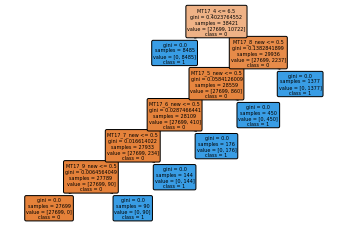

In [64]:
# Visualising the graph without the use of graphvizplt.figure(figsize = (20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df4.columns, 
                     class_names = ['0','1']
                    #  ['access_phone','DG3','DG4_new','access_mm',
                    #                'active_mm','access_bank_full','active_bank_full',
                    #                'age','age_group','UR','edu','Literacy','Numeracy',
                    #                'DG3_new','DG4_new','DL1_new','MT2_new','MT17_1_new',
                    #                'MT17_2_new','MT17_3_new','MT17_4_new','MT17_5_new','MT17_6_new',
                    #                'MT17_7_new','MT17_8_new','MT17_9_new','MT_basic_user',
                    #                'MT12_1_new','MT12_2_new','MT12_3_new','MT12_4_new',
                    #                'MT12_5_new','MT12_6_new','MT12_7_new','MT12_8_new',
                    #                'MT12_9_new','MT12_10_new','MT12_11_new','MT_nonjio'] 
                     ,filled = True , precision = 10, rounded = True)

In [65]:
import graphviz 
dot_data = tree.export_graphviz(dec_tree, out_file=None) 
graph = graphviz.Source(dot_data) 
#graph.render("iris") 


TypeError: [Text(209.25, 201.90857142857143, 'MT17_4 <= 6.5\ngini = 0.4023764552\nsamples = 38421\nvalue = [27699, 10722]\nclass = 0'), Text(167.4, 170.84571428571428, 'gini = 0.0\nsamples = 8485\nvalue = [0, 8485]\nclass = 1'), Text(251.10000000000002, 170.84571428571428, 'MT17_8_new <= 0.5\ngini = 0.1382841899\nsamples = 29936\nvalue = [27699, 2237]\nclass = 0'), Text(209.25, 139.78285714285715, 'MT17_5_new <= 0.5\ngini = 0.0584126009\nsamples = 28559\nvalue = [27699, 860]\nclass = 0'), Text(167.4, 108.72, 'MT17_6_new <= 0.5\ngini = 0.0287466441\nsamples = 28109\nvalue = [27699, 410]\nclass = 0'), Text(125.55000000000001, 77.65714285714284, 'MT17_7_new <= 0.5\ngini = 0.016614022\nsamples = 27933\nvalue = [27699, 234]\nclass = 0'), Text(83.7, 46.59428571428572, 'MT17_9_new <= 0.5\ngini = 0.0064564049\nsamples = 27789\nvalue = [27699, 90]\nclass = 0'), Text(41.85, 15.531428571428563, 'gini = 0.0\nsamples = 27699\nvalue = [27699, 0]\nclass = 0'), Text(125.55000000000001, 15.531428571428563, 'gini = 0.0\nsamples = 90\nvalue = [0, 90]\nclass = 1'), Text(167.4, 46.59428571428572, 'gini = 0.0\nsamples = 144\nvalue = [0, 144]\nclass = 1'), Text(209.25, 77.65714285714284, 'gini = 0.0\nsamples = 176\nvalue = [0, 176]\nclass = 1'), Text(251.10000000000002, 108.72, 'gini = 0.0\nsamples = 450\nvalue = [0, 450]\nclass = 1'), Text(292.95, 139.78285714285715, 'gini = 0.0\nsamples = 1377\nvalue = [0, 1377]\nclass = 1')] is not an estimator instance.